## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [ ]:
!gdown --id 1qZTxZNtD6XRrbwEDUqVuEqLodHMY7w_E

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qZTxZNtD6XRrbwEDUqVuEqLodHMY7w_E
To: /content/Valve_Player_Data.csv
100% 553k/553k [00:00<00:00, 21.7MB/s]


In [ ]:
import pandas as pd
dataset = pd.read_csv('Valve_Player_Data.csv')
dataset

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


## 2. Exploratory Data

In [ ]:
dataset.shape

(5271, 8)

In [ ]:
dataset.columns

Index(['Month_Year', 'Avg_players', 'Gain', 'Percent_Gain', 'Peak_Players',
       'URL', 'Date', 'Game_Name'],
      dtype='object')

In [ ]:
dataset.dtypes

Month_Year       object
Avg_players     float64
Gain            float64
Percent_Gain     object
Peak_Players      int64
URL              object
Date             object
Game_Name        object
dtype: object

In [ ]:
dataset.nunique()

Month_Year       111
Avg_players     5241
Gain            5135
Percent_Gain    3685
Peak_Players    4988
URL               98
Date             111
Game_Name         98
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [ ]:
dataset.isnull().sum()

Month_Year       0
Avg_players      0
Gain            98
Percent_Gain    98
Peak_Players     0
URL              0
Date             0
Game_Name        0
dtype: int64

In [ ]:
dataset['Gain'].dtypes

dtype('float64')

In [ ]:
dataset['Percent_Gain'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [ ]:
imputer = imputer.fit(dataset[['Gain']])
imputer

SimpleImputer()

In [ ]:
dataset[['Gain']] = imputer.transform(dataset[['Gain']])
dataset.isnull().sum()

Month_Year       0
Avg_players      0
Gain             0
Percent_Gain    98
Peak_Players     0
URL              0
Date             0
Game_Name        0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Month_Year      0
Avg_players     0
Gain            0
Peak_Players    0
URL             0
Date            0
Game_Name       0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [ ]:
dataset = dataset.drop('Date', axis=1)
dataset

,Month_Year,Avg_players,Gain,Peak_Players,URL,Game_Name
0,September 2021,512350.92,268.960000,942519,https://steamcharts.com/app/730,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.600000,802544,https://steamcharts.com/app/730,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.720000,763523,https://steamcharts.com/app/730,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.810000,929940,https://steamcharts.com/app/730,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.630000,1087197,https://steamcharts.com/app/730,Counter Strike: Global Offensive
...,...,...,...,...,...,...
5266,December 2016,192.03,-21.900000,405,https://steamcharts.com/app/435150,Divinity: Original Sin 2
5267,November 2016,213.92,-134.680000,537,https://steamcharts.com/app/435150,Divinity: Original Sin 2
5268,October 2016,348.60,-201.750000,1031,https://steamcharts.com/app/435150,Divinity: Original Sin 2
5269,September 2016,550.36,543.260000,2836,https://steamcharts.com/app/435150,Divinity: Original Sin 2


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
dataset.describe()

,Avg_players,Gain,Peak_Players
count,5.271000e+03,5271.000000,5.271000e+03
mean,3.763149e+04,92.071786,7.032072e+04
std,1.032951e+05,15020.229277,1.941948e+05
min,0.000000e+00,-250248.990000,0.000000e+00
25%,6.720205e+03,-1320.090000,1.302900e+04
50%,1.235840e+04,1.470000,2.344700e+04
75%,2.414976e+04,1225.930000,4.610150e+04
max,1.584887e+06,426446.120000,3.236027e+06


<Axes: >

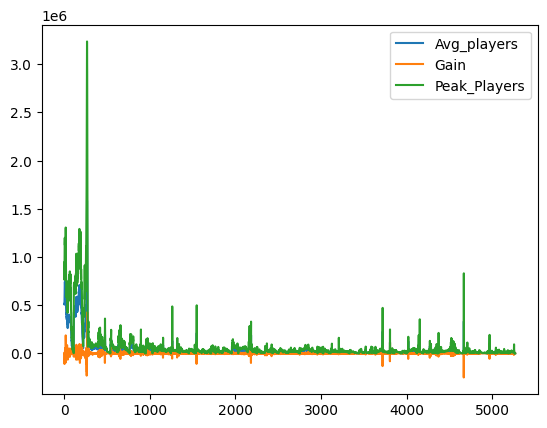

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

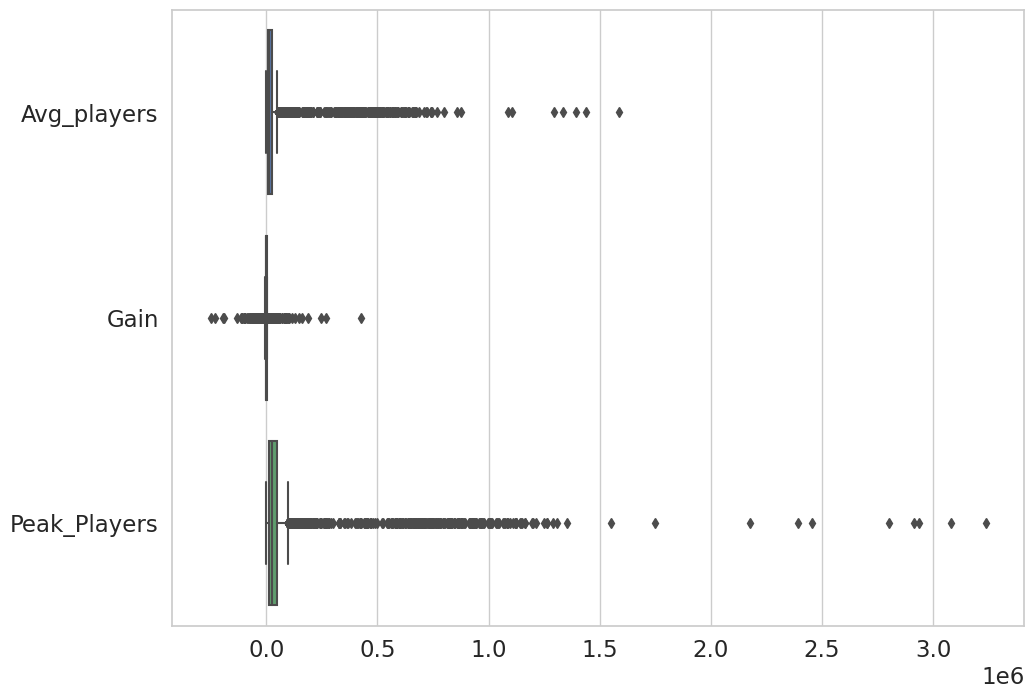

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

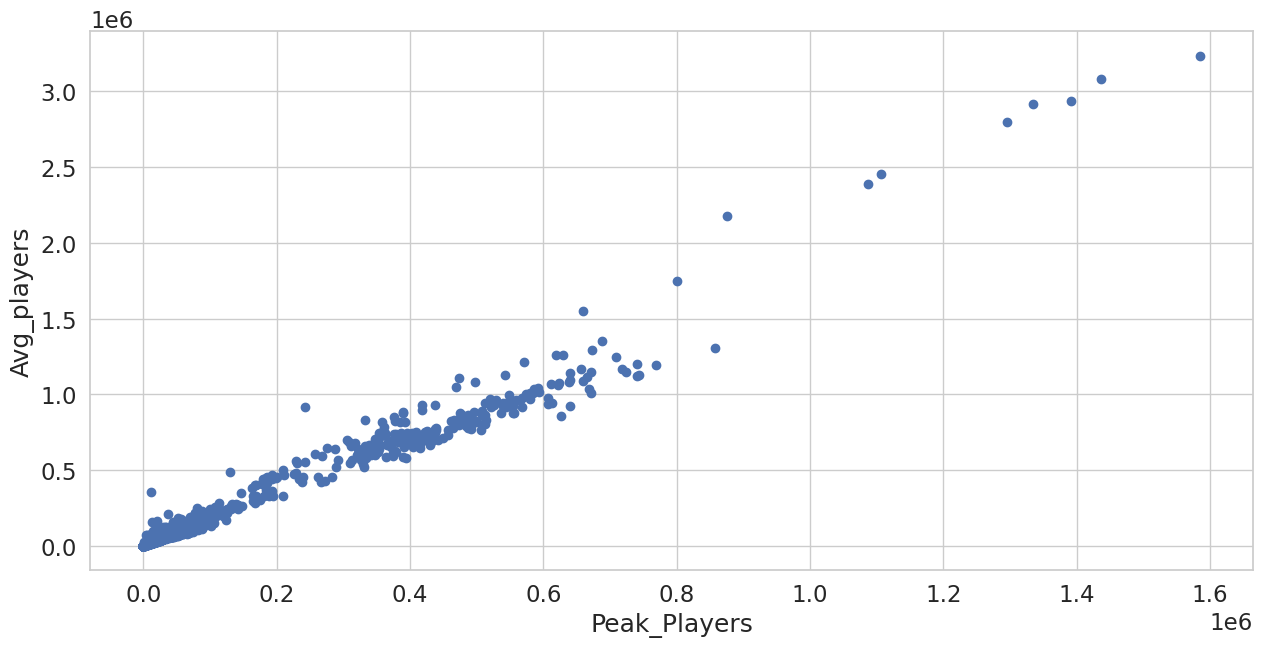

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Avg_players'], dataset['Peak_Players'])
 
# x-axis label
ax.set_xlabel('Peak_Players')
 
# y-axis label
ax.set_ylabel('Avg_players')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
import sklearn

# IQR avarage
Q1 = np.percentile(dataset['Avg_players'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Avg_players'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (5271, 6)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Avg_players'] > upper].index
outliers_lower = dataset[dataset['Avg_players'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (4710, 6)


In [ ]:
import sklearn

# IQR Peak Players
Q1 = np.percentile(dataset['Peak_Players'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Peak_Players'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (4710, 6)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Peak_Players'] > upper].index
outliers_lower = dataset[dataset['Peak_Players'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (4476, 6)


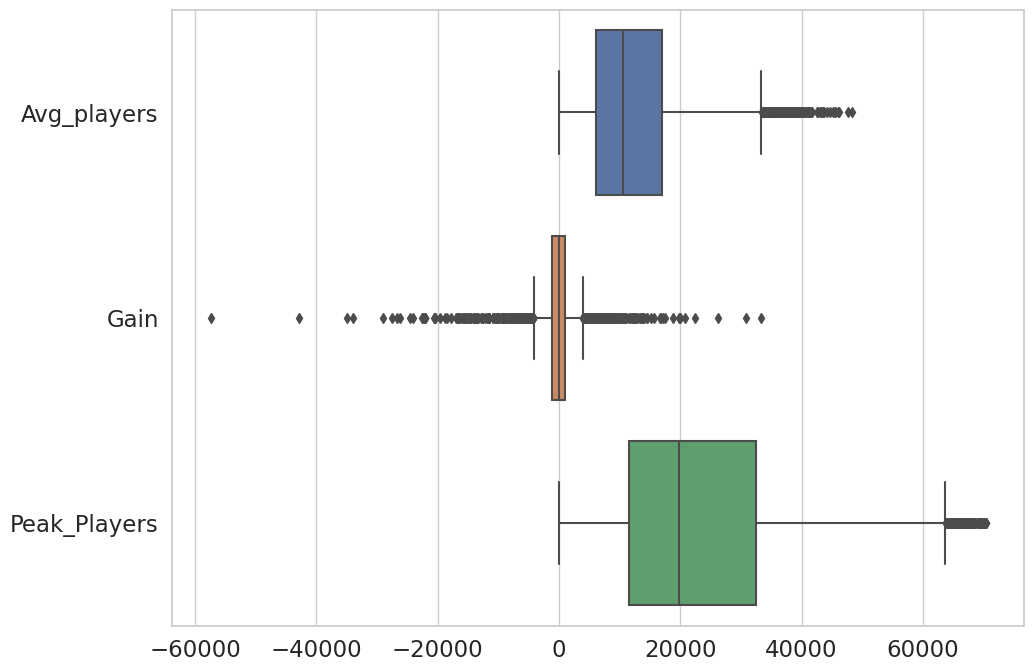

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

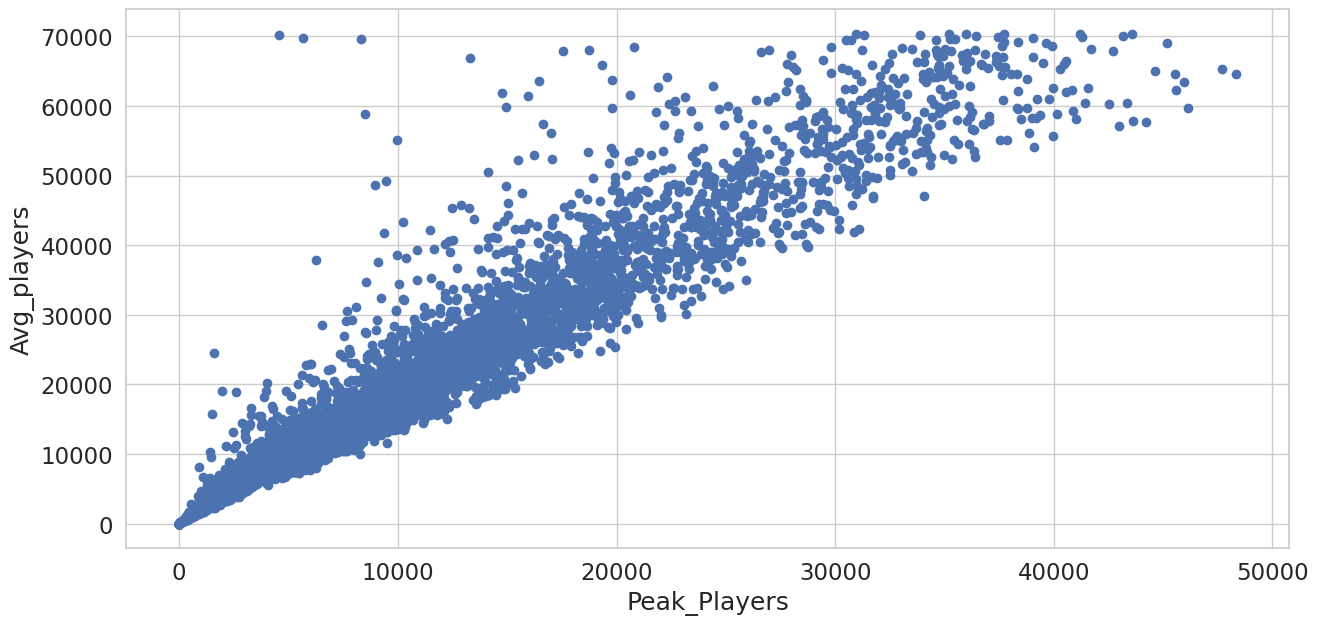

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Avg_players'], dataset['Peak_Players'])
 
# x-axis label
ax.set_xlabel('Peak_Players')
 
# y-axis label
ax.set_ylabel('Avg_players')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

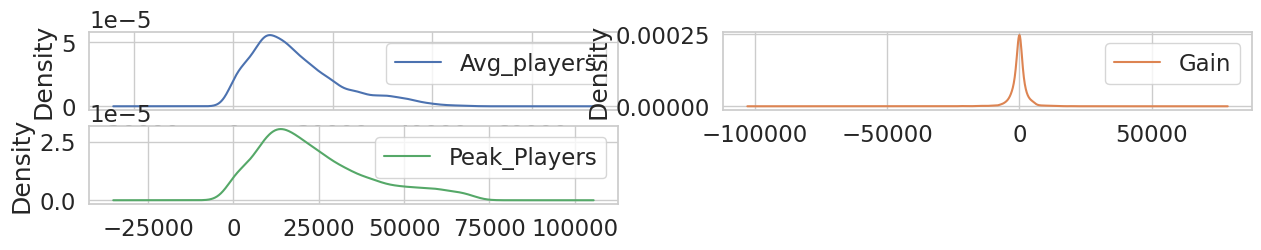

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

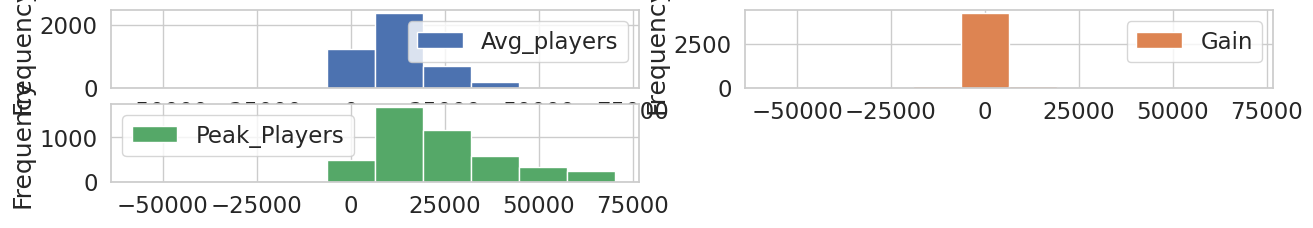

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

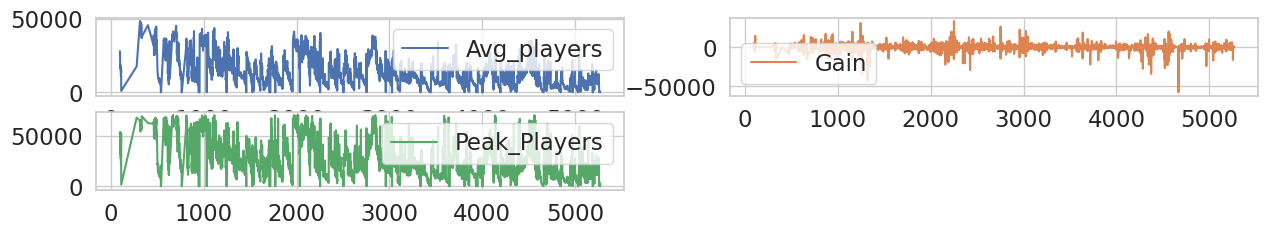

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

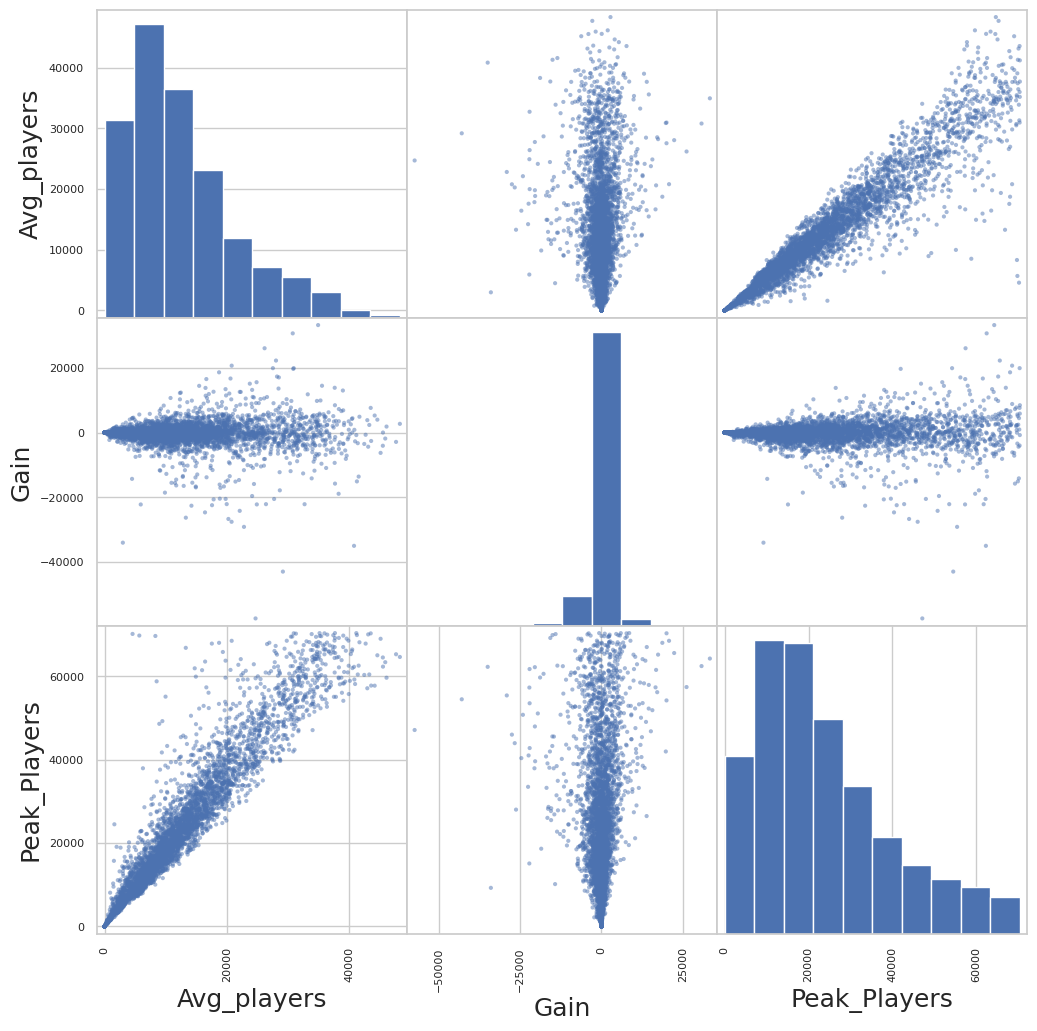

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-69-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


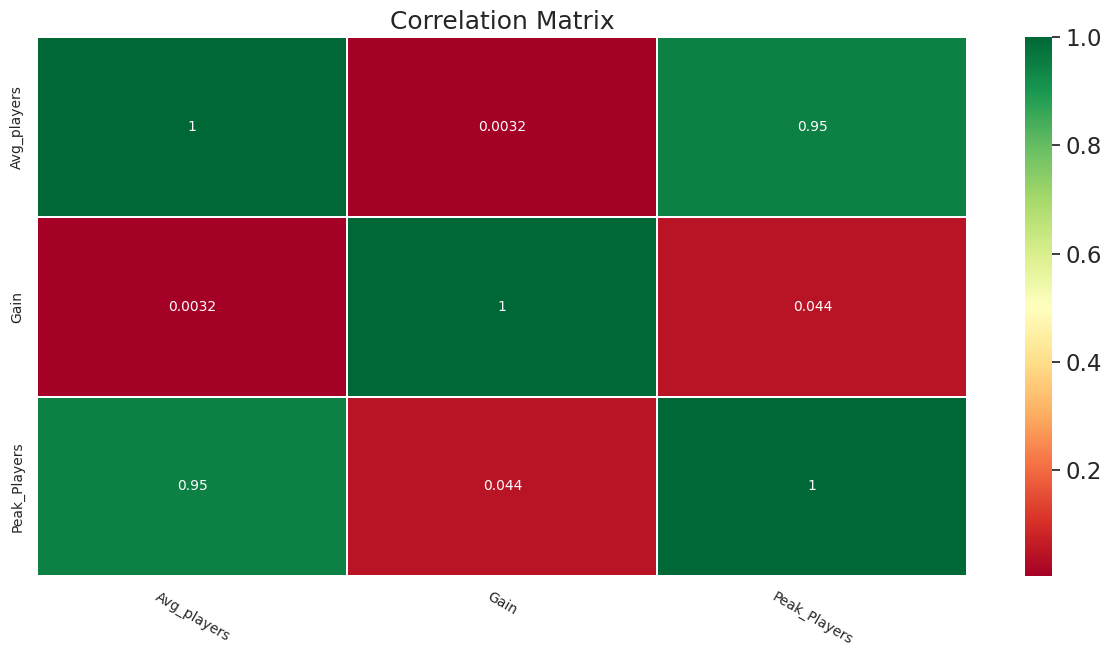

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [ ]:
x = dataset.drop('Type', axis=1)
x

,Suburb,Address,Rooms,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,582000.0,S,Red,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,Western Metropolitan,6380.0


Choose feature Type as a label

In [ ]:
y = dataset["Type"]
y

0        h
1        h
2        h
3        h
4        h
        ..
13574    h
13575    h
13576    h
13577    h
13579    h
Name: Type, Length: 12627, dtype: object

In [ ]:
y.values.reshape(-1,1)

array([['h'],
       ['h'],
       ['h'],
       ...,
       ['h'],
       ['h'],
       ['h']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,SellerG_iSell,SellerG_iTRAK,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,0,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,3,582000.0,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x.shape

(12627, 13041)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040
0,-0.977169,1.080337,-1.336187,-0.399787,-0.940403,-0.762263,-0.620854,-0.708989,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
1,-0.977169,0.101574,-1.336187,-0.399787,-0.940403,-0.762263,-1.678511,-0.871072,-0.797202,-2.290195,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
2,0.106410,1.047345,-1.336187,-0.399787,0.128502,0.799492,-1.678511,-0.948590,0.058751,-2.290195,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
3,0.106410,-0.305328,-1.336187,-0.399787,0.128502,0.799492,-0.620854,-1.089531,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
4,1.189989,1.344274,-1.336187,-0.399787,0.128502,-0.762263,0.436803,-0.997919,-0.037695,1.727062,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.106410,-0.894786,1.068365,-0.597321,0.128502,0.799492,0.436803,-0.518718,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
12623,1.189989,0.563462,1.102715,0.511062,1.197408,0.799492,0.436803,0.876604,0.082472,0.564172,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,5.281547,-0.686664,-0.543699,-0.049609
12624,0.106410,0.092776,-0.597646,-0.959466,0.128502,0.799492,0.436803,-0.247405,-0.146196,1.057519,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,-0.189338,-0.686664,1.839253,-0.049609
12625,0.106410,0.398502,-0.597646,-0.959466,0.128502,0.799492,2.552116,0.115519,0.082472,1.127998,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,-0.189338,-0.686664,1.839253,-0.049609


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040
0,0.111111,0.615894,0.052854,0.068577,0.10,0.125,0.1,0.148858,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.419426,0.052854,0.068577,0.10,0.125,0.0,0.114959,0.011633,0.856448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.609272,0.052854,0.068577,0.15,0.250,0.0,0.098747,0.022088,0.856448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.337748,0.052854,0.068577,0.15,0.250,0.1,0.069270,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.668874,0.052854,0.068577,0.15,0.125,0.2,0.088430,0.020910,0.995134,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.222222,0.219426,0.348837,0.050154,0.15,0.250,0.2,0.188651,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12623,0.333333,0.512141,0.353066,0.153531,0.20,0.250,0.2,0.480472,0.022378,0.954988,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12624,0.222222,0.417660,0.143763,0.016377,0.15,0.250,0.2,0.245394,0.019585,0.972019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12625,0.222222,0.479029,0.143763,0.016377,0.15,0.250,0.4,0.321297,0.022378,0.974453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'h': 7021, 'u': 2214, 't': 866})
Test distribution Counter({'h': 1756, 'u': 553, 't': 217})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.864469 (0.007691)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8705463182897862


In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           h       0.89      0.97      0.93      1756
           t       0.65      0.22      0.33       217
           u       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526

